<a href="https://colab.research.google.com/github/Alicdc2022/Practicas_RedesNeuronales_AlineCamposGalleguillos/blob/main/Modelo_de_regresion_Aline_Campos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cuaderno con modelo para regresion

# Regression

##1. Importando librerías

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import models, layers, optimizers


##2. Descargando datos

In [2]:
(train_data , train_targets) ,(test_data,test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data[1]

array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

In [4]:
train_targets[1]

42.3

##3. Normalización

In [5]:
mean = train_data.mean(axis=0)
train_data = train_data  - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std



##4. Definiendo nuestra red

In [6]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
    return model

##5. K - fold validation

In [7]:
k = 4
num_val_samples = len(train_data) // 4
num_epoch = 80
all_history = []

In [8]:
0*num_val_samples

0

In [9]:
(0+1) * num_val_samples

101

In [10]:
for i in range(k):
    print("Fold " , i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0
    )

    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0
    )
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16,
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])


Fold  0
Fold  1
Fold  2
Fold  3


##6. Media de todos los MAE

In [11]:
len(all_history[0])

80

In [12]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

##7. Visualizando resultados

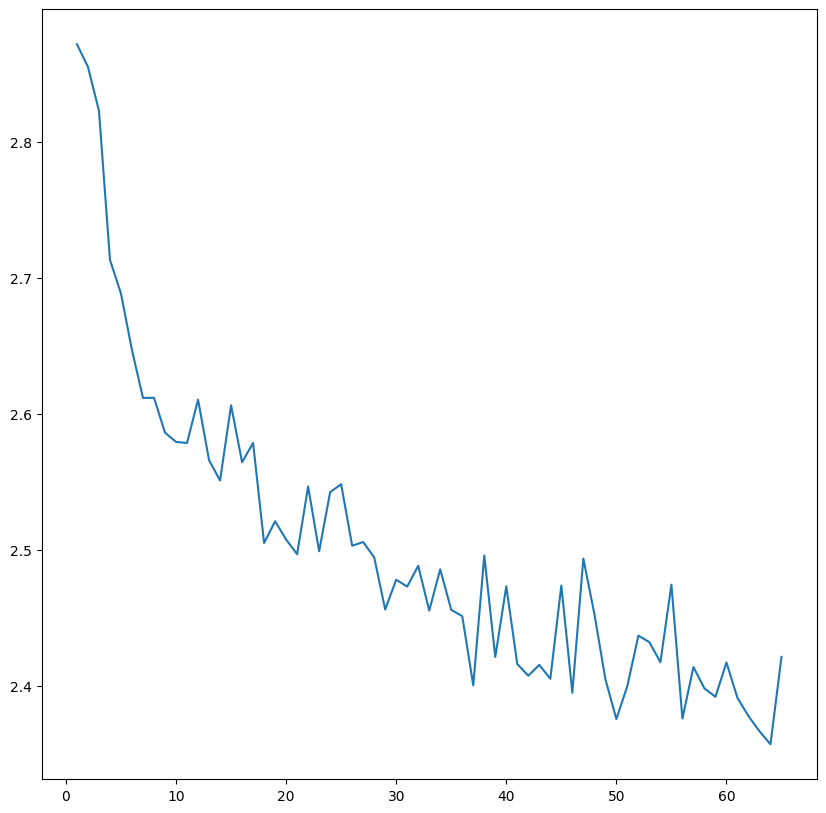

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

##8. Evaluando el modelo

In [14]:
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 21.1212 - mae: 2.7884


[21.121179580688477, 2.7883551120758057]